## Course Project: GC Color-Color Distributions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.ndimage import maximum_filter
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import numpy as np
import seaborn as sea
from scipy.special import gamma
import matplotlib.patches as mpatches
import dpm
reload(dpm)



plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

In [5]:
stats.__file__

'/Users/zach/anaconda/envs/astro/lib/python2.7/site-packages/scipy/stats/__init__.pyc'

In [199]:
data = np.genfromtxt('phot.dat',dtype=str)
g = []
for j in data[:,2]:
    g.append(float(j.split('±')[0]))
    
r = []
for j in data[:,3]:
    r.append(float(j.split('±')[0]))
    
i = []
for j in data[:,4]:
    i.append(float(j.split('±')[0]))

g = np.array(g)
r = np.array(r)
i = np.array(i)

gi = g-i
ri = r-i

phot_data = np.stack([g-i,r-i],axis=1)

mask = (phot_data[:,0] > 0.6) & (phot_data[:,0] < 1.2) & \
                     (phot_data[:,1] > 0.15) & (phot_data[:,1] < 0.5)

phot_data = phot_data[mask]
n4494 = phot_data

In [200]:
prior_4494 = {'nu_phi':4.,'cov_phi':np.array([[1.0,0.00],[0.00,0.5]]),\
        'a_alpha':3.,'b_alpha':1.,\
        'mean_psi_loc':np.array([0.9,0.25]),'cov_psi_loc':np.array([[0.5,0.0],[0.0,0.3]]),\
        'nu_psi_cov':np.array([5.]),'cov_psi_cov':np.array([[0.5,0.0],[0.0,0.5]])}

mix_4494 = dpm.DPM(prior_4494,data=n4494)


In [201]:
mix_4494.mcmc_step(n_step=3000)

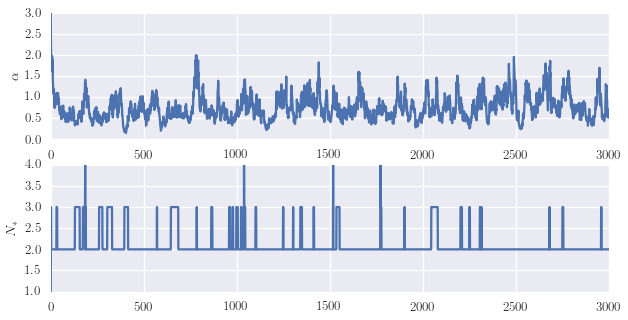

In [265]:
sea.set_context('talk')
fig,ax = plt.subplots(2,1,figsize=(10,5))
ax[0].plot(mix_4494.alpha_arr)
ax[0].set_ylabel(r'$\alpha$')
ax[1].plot(mix_4494.n_star_arr)
ax[1].set_ylabel(r'$N_*$')
fig.savefig('n4494_traces.pdf')

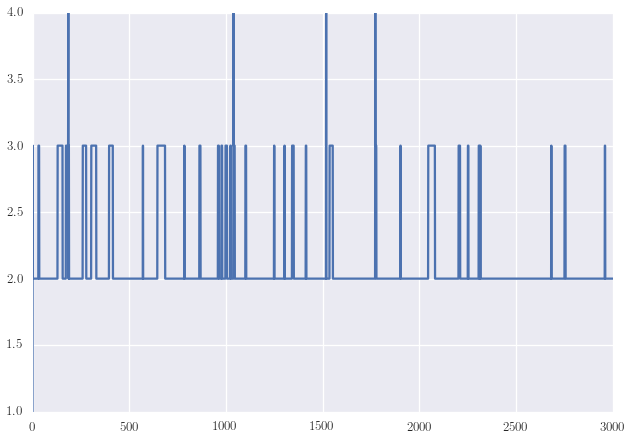

In [202]:
plt.plot(mix_4494.n_star_arr)

In [709]:
print mix_4494.pos['z'][0,:]

[ 0.90016544  0.30049593]


In [203]:
xx, yy = np.meshgrid(np.linspace(0.6,1.2,60),np.linspace(0.15,0.5,60))
grid = np.vstack([xx.ravel(),yy.ravel()])
print grid.shape

post_arr_4494 = mix_4494.draw_post(grid=grid.T,n_draw=400,n_burn=1000,skip=4,calc_mean=False)

(2, 3600)


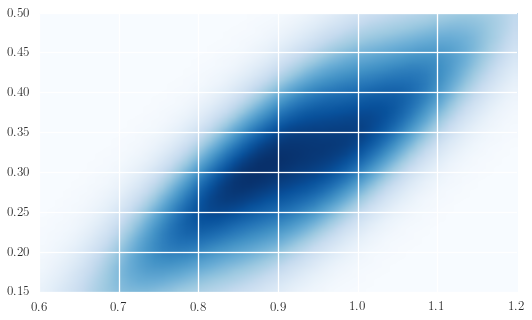

In [267]:
fig,ax = plt.subplots(figsize=(10,5))
ax.imshow(np.mean(post_arr_4494,axis=1).reshape(60,60),origin='lower',cmap='Blues',extent=(0.6,1.2,0.15,0.5))
#ax.scatter(n4494[:,0],n4494[:,1])
#plt.scatter((np.array(x)/20.)- 0.5,(np.array(y)/20.)- 0.5,s=100,c='r')
#plt.scatter(means[:,0] * 30,means[:,1] * 30)
fig.savefig('n4494_data_fit.pdf')

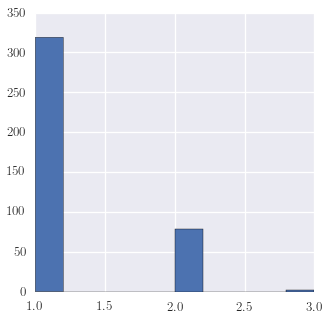

In [263]:
n_max_arr = mode_find(post_arr_4494,threshold=0.005,dims=(60,60))
sea.set_context('talk')
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(n_max_arr)
fig.savefig('n4494_mode_post.pdf')

In [716]:
neighborhood_size = 3
threshold = 0.001
data = np.mean(post_arr_4494,axis=1).reshape(60,60)
data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

In [717]:
print num_objects

1


In [3]:
#now start working with actual data
n3115 = np.genfromtxt('n3115_phot_data.csv',delimiter=',')
n3115 = n3115[:,:2]
print n3115.shape

(623, 2)


In [173]:
prior_3115 = {'nu_phi':4.,'cov_phi':np.array([[1.0,0.00],[0.00,0.5]]),\
        'a_alpha':3.,'b_alpha':1.,\
        'mean_psi_loc':np.array([0.9,0.25]),'cov_psi_loc':np.array([[0.5,0.0],[0.0,0.3]]),\
        'nu_psi_cov':np.array([5.]),'cov_psi_cov':np.array([[0.5,0.0],[0.0,0.5]])}

mix_3115_check = dpm.DPM(prior_3115,data=n3115,n=50)

In [181]:
mix_3115_check.mcmc_step(n_step=3000)

In [182]:
print mix_3115_check.z_arr.shape

(50, 2, 3501)


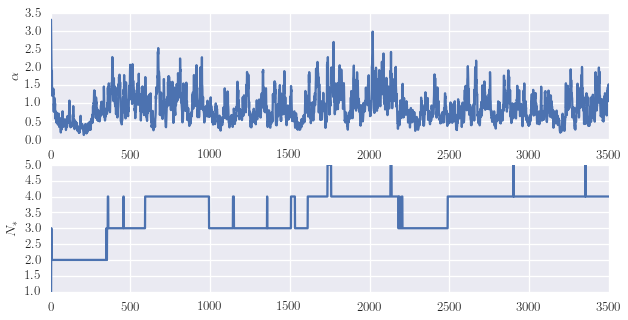

In [190]:
sea.set_context('talk')
fig,ax = plt.subplots(2,1,figsize=(10,5))
ax[0].plot(mix_3115_check.alpha_arr)
ax[0].set_ylabel(r'$\alpha$')
ax[1].plot(mix_3115_check.n_star_arr)
ax[1].set_ylabel(r'$N_*$')
fig.savefig('n3115_traces.pdf')

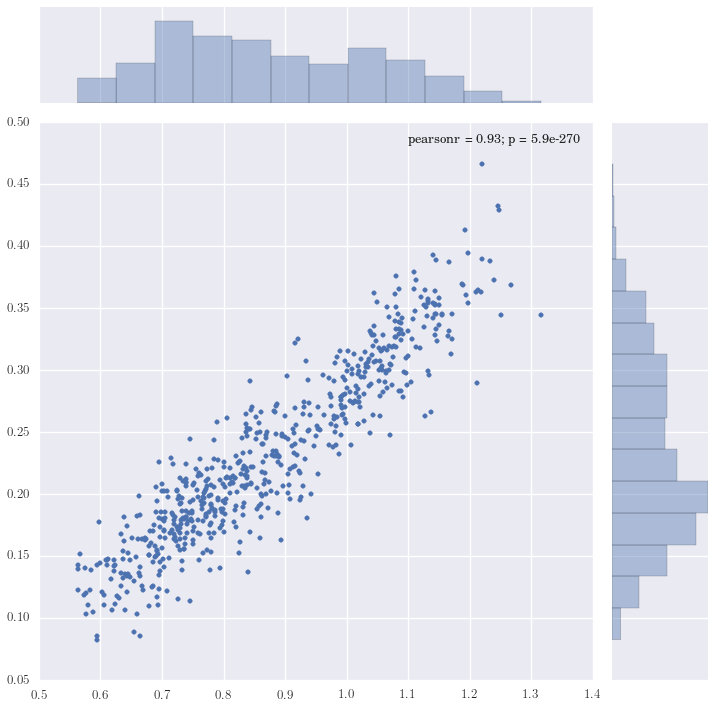

In [197]:
sea.set_context('talk')
jp = sea.jointplot(n3115[:,0],n3115[:,1],size=10)
jp.xlim=(0.6,1.4)
jp.ylim=(0.15,0.7)
jp.savefig('n3115_data.pdf')

In [178]:
print mix_3115_check.pos['phi']

[[ 0.01152316  0.00990389]
 [ 0.00990389  0.01067633]]


In [185]:
xx, yy = np.meshgrid(np.linspace(0.5,1.4,60),np.linspace(0.05,0.5,60))
grid = np.vstack([xx.ravel(),yy.ravel()])
print grid.shape

post_arr_3115 = mix_3115_check.draw_post(grid=grid.T,n_draw=400,n_burn=1000,skip=4,calc_mean=False)

(2, 3600)


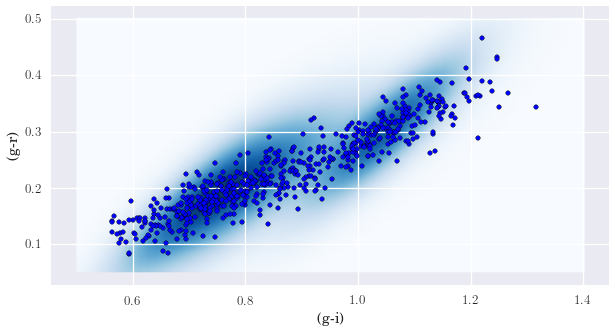

In [266]:
fig,ax = plt.subplots(figsize=(10,5))
ax.imshow(np.mean(post_arr_3115,axis=1).reshape(60,60),origin='lower',cmap='Blues',extent=(0.5,1.4,0.05,0.5))
ax.scatter(n3115[:,0],n3115[:,1])
#plt.scatter((np.array(x)/20.)- 0.5,(np.array(y)/20.)- 0.5,s=100,c='r')
#plt.scatter(means[:,0] * 30,means[:,1] * 30)
ax.set_xlabel('(g-i)')
ax.set_ylabel('(g-r)')
fig.savefig('n3115_data_fit.pdf')

In [261]:
n_max_arr = mode_find(post_arr_3115,threshold=0.005,dims=(60,60))

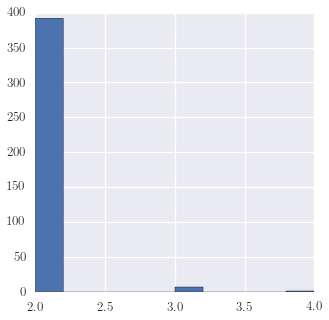

In [262]:
n_max_arr = mode_find(post_arr_3115,threshold=0.005,dims=(60,60))
sea.set_context('talk')
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(n_max_arr)
fig.savefig('n3115_mode_post.pdf')

In [162]:
neighborhood_size = 5
threshold = 0.001
data = np.mean(post_arr_3115,axis=1).reshape(60,60)
data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

In [163]:
print num_objects

3


In [255]:
'''prior_1 = {'nu_phi':3.,'cov_phi':np.array([1.]),'a_alpha':1.,'b_alpha':1.,\
        'mean_psi_loc':np.array([0.0]),'cov_psi_loc':np.array([3.0]),\
        'psi_cov':np.array([5.0])}#'nu_psi_cov':5.,'cov_psi_cov':np.array([1.0])}

prior_2 = {'nu_phi':3.,'cov_phi':np.array([1.]),'a_alpha':1.,'b_alpha':1.,\
        'mean_psi_loc':np.array([0.0]),'cov_psi_loc':np.array([3.0]),\
        'nu_psi_cov':3.,'cov_psi_cov':np.array([10.0])}
'''
#prior = {'phi':1.,'a_alpha':1.,'b_alpha':1.,'psi_loc':0.,'psi_cov':5.}
prior_2d = {'nu_phi':4.,'cov_phi':np.array([[0.025,0.00],[0.00,0.025]]),\
        'a_alpha':1.,'b_alpha':1.,\
        'psi_loc':np.array([1.25,1.25]),\
        'psi_cov':np.array([[0.5,0.0],[0.0,0.5]])}

prior_2d_free = {'phi':np.array([[0.25,0.0],[0.0,0.25]]),\
        'a_alpha':1.,'b_alpha':1.,\
        'mean_psi_loc':np.array([1.0,1.0]),'cov_psi_loc':np.array([[1.,0.0],[0.0,1.]]),\
        'nu_psi_cov':np.array([5.]),'cov_psi_cov':np.array([[2.,0.0],[0.0,2.]])}

mix = dpm.DPM(prior_2d_free,data=fake_data)

Phi fixed to [[ 0.25  0.  ]
 [ 0.    0.25]]


In [256]:
print mix.nu_phi

AttributeError: 'DPM' object has no attribute 'nu_phi'

In [257]:
mix.mcmc_step(n_step=500)

In [258]:
print mix.pos['l']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


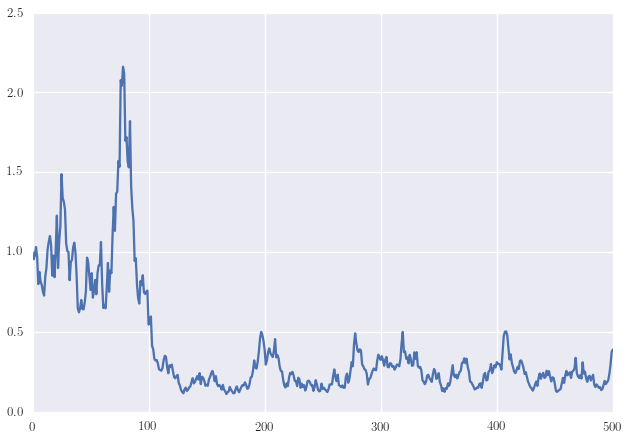

In [259]:
plt.plot(mix.alpha_arr)

In [243]:
foo = np.array([[0.5,0.0],[0.0,0.5]])
print np.tile(foo,5).reshape(5,2,2)

[[[ 0.5  0. ]
  [ 0.5  0. ]]

 [[ 0.5  0. ]
  [ 0.5  0. ]]

 [[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.   0.5]
  [ 0.   0.5]]

 [[ 0.   0.5]
  [ 0.   0.5]]]


In [251]:
xx, yy = np.meshgrid(np.linspace(-0.5,2.5,60),np.linspace(-0.5,2.5,60))
grid = np.vstack([xx.ravel(),yy.ravel()])
print grid.shape

post_arr = mix.draw_post(grid=grid.T,n_draw=100,n_burn=399,calc_mean=False)

(2, 3600)


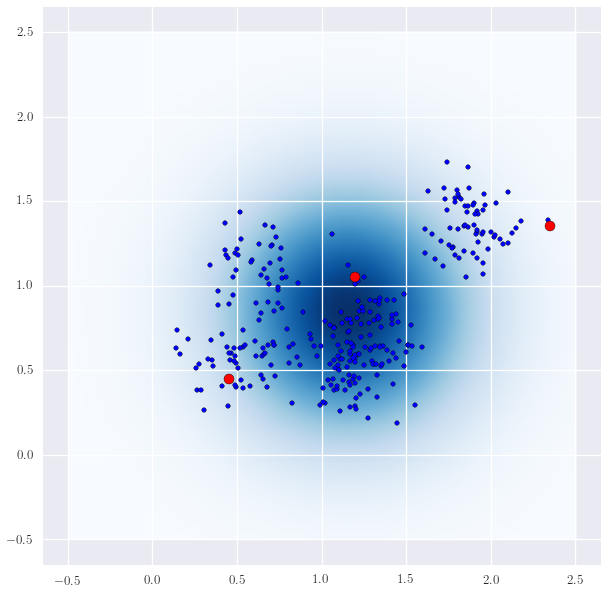

In [252]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(np.mean(post_arr,axis=1).reshape(60,60),origin='lower',cmap='Blues',extent=(-0.5,2.5,-0.5,2.5))
ax.scatter(fake_data[:,0],fake_data[:,1])
plt.scatter((np.array(x)/20.)- 0.5,(np.array(y)/20.)- 0.5,s=100,c='r')
#plt.scatter(means[:,0] * 30,means[:,1] * 30)
#fig.savefig('fake_data_model_fit_modes_found.pdf')

In [563]:
print fake_data.shape

(300, 2)


In [169]:
print np.mean(post_arr,axis=1).reshape(50,50)

[[  4.73527766e-11   1.23263724e-10   3.09193323e-10 ...,   1.78788397e-09
    7.71557747e-10   3.21888583e-10]
 [  3.61207133e-11   7.25147385e-11   1.63259539e-10 ...,   1.20397088e-08
    5.50298189e-09   2.42073020e-09]
 [  8.12223430e-10   9.83333427e-10   1.15719863e-09 ...,   4.00529436e-08
    1.94284910e-08   9.06986943e-09]
 ..., 
 [  1.89939441e-05   2.17123725e-05   2.39157878e-05 ...,   1.58152140e-03
    1.21190757e-03   8.94126568e-04]
 [  4.00956176e-05   4.85453715e-05   5.65860933e-05 ...,   1.70215430e-03
    1.38514641e-03   1.08540370e-03]
 [  4.23303911e-05   5.45488777e-05   6.77159717e-05 ...,   9.16630342e-04
    7.94254220e-04   6.63079746e-04]]


(0.8, 1.5)

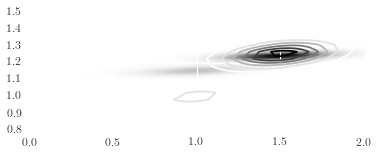

In [189]:
fig,ax = plt.subplots()
#plt.plot(np.linspace(0,2,50),np.mean(post_arr,axis=1).reshape(50,50)[:,20])
ax.contour(np.linspace(0,2.0,50),np.linspace(0,2.0,50),np.mean(post_arr,axis=1).reshape(50,50))
im = ax.imshow(np.mean(post_arr,axis=1).reshape(50,50), interpolation='bilinear', origin='lower',
                extent=(0.0,2.0,0.8,1.5))
ax.set_ylim(0.8,1.5)

In [260]:
print post_arr.shape

(2500, 100)


In [248]:
print np.max(np.mean(post_arr,axis=1))

9.53665715945


[(slice(31L, 32L, None), slice(25L, 26L, None)), (slice(37L, 38L, None), slice(9L, 10L, None)), (slice(37L, 38L, None), slice(24L, 25L, None))]


In [246]:
print iy

[32 34 23 37 12 38]


In [125]:
print np.mean(mix.data_star,axis=0)

[ 0.98572778  0.99417878]


In [103]:
print mix.l_arr[99,:]
print mix.z_arr[0,:,100]

IndexError: index 99 is out of bounds for axis 0 with size 11

In [104]:
print mix.this_mean

[ 0.97494104  0.89221988]


In [120]:
print np.dstack([mix.pos['phi'] for i in range(20)])[...,10]

[[ 0.05    0.0042]
 [ 0.0042  0.0027]]


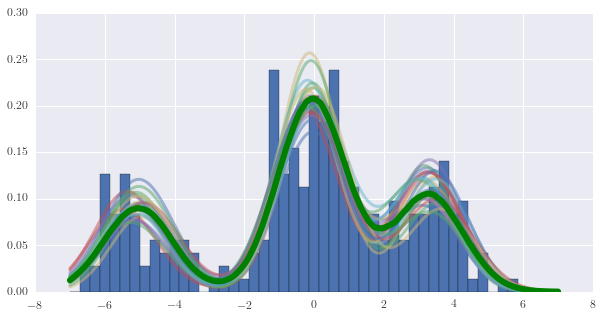

In [508]:
fig,ax = plt.subplots(figsize=(10,5))
foo = plt.hist(mix.data,normed=True,bins=np.linspace(-7,7,50))
for i in range(25):
    ax.plot(np.linspace(-7,7,1000),post_arr[:,7*i],alpha=0.5,linewidth=3)
ax.plot(np.linspace(-7,7,1000),np.percentile(post_arr,50,axis=1),linewidth=6,color='g')

#for i in range(30):
#    plt.plot(np.linspace(-7,7,1000),post_arr[:,i+20])

In [155]:
print np.sum((mix.data - mix.pos['z'][mix.pos['l']])**2)

1364.40869123


In [219]:
#make some fake MVM data
weights = np.ones(5) / 5.
data_size = 300
dim = 2
fake_data = np.zeros((data_size,dim))

n_means = 5
means = np.array([])
for i in range(n_means):
    means=np.hstack([means,stats.uniform.rvs(0,2,size=2)])
    
means = means.reshape(n_means,2)

cov_1 = np.array([[0.025, 0.00],[0.00, 0.025]])
cov_2 = np.array([[0.045, 0.0042],[0.0042,.045]])
cov_3 = np.array([[0.05, 0.004],[0.0042,.05]])
cov_4 = np.array([[0.01, 0.0],[0.0,.01]])
cov_5 = np.array([[0.015, 0.01],[0.01,.015]])

covs = np.dstack([cov_1,cov_2,cov_3,cov_4,cov_5])

for i in range(data_size):
    j = np.argmin(np.ma.masked_less(np.cumsum(weights) - np.random.uniform(),0))
    fake_data[i,:] = stats.multivariate_normal.rvs(mean=means[j,...],cov=cov_1)

In [220]:
print fake_data.shape

(300, 2)


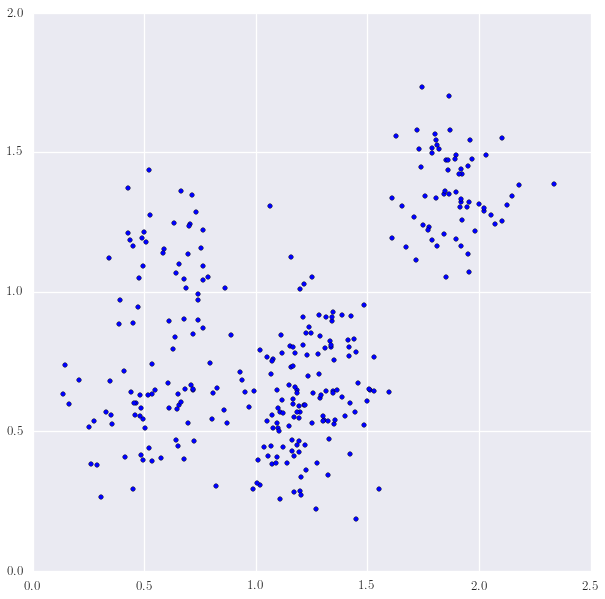

In [221]:
fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(fake_data[:,0],fake_data[:,1])
fig.savefig('fake_data.pdf')

In [52]:
prior_fake_data = {'nu_phi':5.,'cov_phi':np.array([[0.1,0.0],[0.0,0.1]]),\
        'a_alpha':5.,'b_alpha':1.,\
        'mean_psi_loc':np.array([1.0,1.0]),'cov_psi_loc':np.array([[2.,0.0],[0.0,2.]]),\
        'nu_psi_cov':np.array([10.]),'cov_psi_cov':np.array([[1.,0.0],[0.0,1.]])}

mix_fake_data = dpm.DPM(prior_fake_data,data=fake_data,indv_phi=True,n=50)


AttributeError: 'DPM' object has no attribute 'n'

In [51]:
mix_fake_data.pos['phi',indv_phi=True]

SyntaxError: invalid syntax (<ipython-input-51-69b4976edab7>, line 1)

In [320]:
n_means = 20
means = np.array([])
for i in range(n_means):
    means=np.hstack([means,stats.uniform.rvs(0,2,size=2)])

In [325]:
print means.reshape(20,2)

[[ 1.78955417  1.76660537]
 [ 1.31350029  1.41476248]
 [ 1.54598993  0.24249053]
 [ 0.02140853  1.13063193]
 [ 1.77754445  1.77449341]
 [ 0.3987725   0.68153251]
 [ 1.25629334  0.206424  ]
 [ 1.03046843  1.39673933]
 [ 1.10857428  0.99918862]
 [ 1.16728898  0.07264027]
 [ 0.63595358  1.00561925]
 [ 1.76066012  0.69581875]
 [ 0.37226837  0.60878369]
 [ 0.24579046  0.07607658]
 [ 1.62479339  1.82522888]
 [ 0.9443575   1.10347219]
 [ 1.50789353  0.30638072]
 [ 0.94569294  0.48132696]
 [ 0.67227064  0.62879379]
 [ 0.2460389   1.00342656]]


In [179]:
print covs[...,1]

[[ 0.0082  0.0042]
 [ 0.0042  0.0018]]


In [180]:
print stats.multivariate_normal.rvs(mean=means[...,j],cov=covs[...,j])

[ 1.31066174  1.15622565]


/Users/zach/anaconda/envs/astro/lib/python2.7/site-packages/scipy/stats/_multivariate.py:528: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


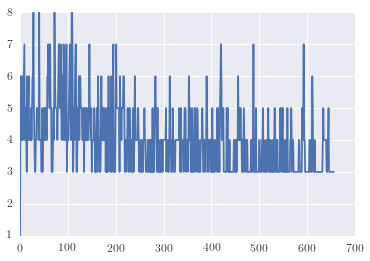

In [185]:
plt.plot(mix.z_arr)

In [132]:
print np.log(mix.pos['p'][-1])
np.sum(np.log(1.-mix.pos['v_l_star']))

-1.21381470847


-1.2138147084736646

In [124]:
print np.exp(np.cumsum(np.log(1.-mix.v_l_star[0:-1])))
print mix.m_l.shape
print mix.m_l_rev_sum[1:]
print mix.m_l[:-1]
print mix.pos['z'].ravel()
print mix.pos['l'].ravel()

[ 0.98759061  0.98020919  0.9732876   0.92355173  0.92174012  0.91082991
  0.9023375   0.88810194  0.88787366  0.88760588  0.87212635  0.85694461
  0.79936856  0.79159395  0.77681975  0.75797675  0.734647    0.72715778
  0.7253023   0.71001187  0.70925196  0.70826478  0.69807832  0.69265027
  0.68940273  0.68771259  0.67897537  0.67478605  0.67000648  0.64540361
  0.64333079  0.64063641  0.63932205  0.62829076  0.62265302  0.61713672
  0.61379591  0.58830964  0.58394999  0.57661165  0.56194135  0.55692444
  0.54627613  0.51575436  0.5091765   0.50785199  0.50236536  0.5008685
  0.48981169  0.48950229  0.48047667  0.47130844  0.47092669  0.46170904
  0.4595657   0.44500254  0.42958251  0.42842706  0.42834999  0.42690545
  0.42457023  0.42013149  0.41925822  0.41671705  0.41535683  0.41423396
  0.41083471  0.4103089   0.41021775  0.4052288   0.39430647  0.39358386
  0.39229521  0.39203678  0.38421308  0.38416791  0.38256895  0.38080009
  0.37916057  0.3690694   0.36682858  0.35711644  0.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   1.,   5.,   5.,  13.,  10.,  12.,   7.,
          7.,  14.,  11.,   8.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-31.10890716, -29.65143172, -28.19395628, -26.73648085,
        -25.27900541, -23.82152997, -22.36405454, -20.9065791 ,
        -19.44910366, -17.99162823, -16.53415279, -15.07667735,
        -13.61920192, -12.16172648, -10.70425104,  -9.24677561,
         -7.78930017,  -6.33182473,  -4.8743493 ,  -3.41687386,
         -1.95939842,  -0.50192299,   0.95555245,   2.41302789,
          3.87050332,   5.32797876,   6.7854542 ,   8.24292963,
          9.70040507,  11.15788051,  12.61535594,  14.07283138,
         15.53030682,  16.98778225,  18.44525769,  19.90273313,
         21.36020856,  22.817684  ,  24.27515944,  25.73263487,  27.19011031]),
 <a list of 40 Patch objects>)

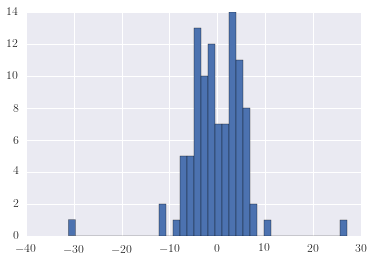

In [96]:
plt.hist(mix.pos[''],bins=40)

In [97]:
mix.update_z()
mix.update_p()
mix.update_l()
#mix.draw_alpha()

In [36]:
print np.sum(mix.pos['l'] == 2)

5


(array([  0.,   0.,   0.,   6.,  11.,  12.,   7.,   6.,   6.,   6.,   1.,
          2.,   2.,   5.,  21.,  15.,  23.,  19.,  22.,  14.,   8.,   8.,
         11.,   8.,  17.,  11.,   4.,   3.,   1.,   1.,   0.,   0.,   0.,
          0.]),
 array([-8.        , -7.52941176, -7.05882353, -6.58823529, -6.11764706,
        -5.64705882, -5.17647059, -4.70588235, -4.23529412, -3.76470588,
        -3.29411765, -2.82352941, -2.35294118, -1.88235294, -1.41176471,
        -0.94117647, -0.47058824,  0.        ,  0.47058824,  0.94117647,
         1.41176471,  1.88235294,  2.35294118,  2.82352941,  3.29411765,
         3.76470588,  4.23529412,  4.70588235,  5.17647059,  5.64705882,
         6.11764706,  6.58823529,  7.05882353,  7.52941176,  8.        ]),
 <a list of 34 Patch objects>)

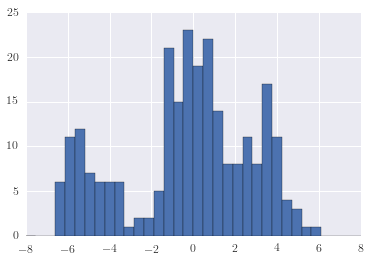

In [296]:
plt.hist(mix.data,bins=np.linspace(-8,8,35))

In [278]:
iter =  list(chain.from_iterable(zip(*np.linspace(-5,5,1000).reshape(10,100))))
print iter[1]

-3.998998999


In [268]:
from itertools import chain

In [219]:
print mix.z_arr[mix.this_l,:,:]

[[[ 0.         -0.43017557  0.12931526  0.31006212  0.0695258   0.16156423
    0.04568859  0.06378977 -0.11650774  0.03120742 -0.26200592]]

 [[ 0.         -2.50001816 -4.33509588 -4.73376901 -5.34107392 -5.12493348
   -5.10445811 -4.88231346 -5.07867729 -5.10876329 -5.0852183 ]]

 [[ 0.         -1.45874675  0.2090221   0.50344777  0.39629915  0.61321227
   -0.08527698 -0.23403647 -0.97073287 -1.57812595 -0.74007606]]

 [[ 0.         -0.43017557  0.12931526  0.31006212  0.0695258   0.16156423
    0.04568859  0.06378977 -0.11650774  0.03120742 -0.26200592]]

 [[ 0.         -0.43017557  0.12931526  0.31006212  0.0695258   0.16156423
    0.04568859  0.06378977 -0.11650774  0.03120742 -0.26200592]]

 [[ 0.         -0.43017557  0.12931526  0.31006212  0.0695258   0.16156423
    0.04568859  0.06378977 -0.11650774  0.03120742 -0.26200592]]

 [[ 0.         -0.43017557  0.12931526  0.31006212  0.0695258   0.16156423
    0.04568859  0.06378977 -0.11650774  0.03120742 -0.26200592]]

 [[ 0.       

In [81]:
print np.argmin(np.ma.masked_less(np.cumsum(mix.p_arr,axis=1) - np.random.uniform(size=11).reshape(11,1),0.),axis=1)

ValueError: operands could not be broadcast together with shapes (2,100) (11,1) 

In [76]:
print mix.z_arr.shape

(1100, 1)


In [53]:
print (np.cumsum(mix.p_arr,axis=1)[9])

[ 0.50243328  0.61716687  0.6172658   0.75196179  0.77043204  0.77133467
  0.77547154  0.77928322  0.78168738  0.78521857  0.78585488  0.79606182
  0.798531    0.80058394  0.80191375  0.80325484  0.80415604  0.81585356
  0.82065832  0.82385744  0.82645438  0.83025221  0.83148851  0.83260098
  0.83327508  0.83491756  0.83746733  0.84044869  0.8407148   0.85096629
  0.85146126  0.85229215  0.85346076  0.85481523  0.8583239   0.85868039
  0.8592692   0.85977775  0.85982605  0.86169541  0.86221206  0.86342607
  0.86821202  0.87028159  0.87041368  0.87084063  0.87600817  0.87654377
  0.87668383  0.87670978  0.8768361   0.87748388  0.87837663  0.87992176
  0.88050724  0.88055063  0.88089941  0.88194758  0.88344672  0.88368335
  0.88388591  0.89167764  0.89315448  0.89650535  0.89689998  0.89892347
  0.89898794  0.90101145  0.90116895  0.90160582  0.90392605  0.90478009
  0.90497801  0.90575888  0.90681599  0.90804832  0.9083293   0.90875047
  0.90877987  0.90891345  0.90930967  0.90943775  0

In [120]:
print np.where(np.random.multinomial(1,mix.probs) != 0)[0][0]

3


In [94]:
print mix.probs.shape
print np.sum(mix.probs)
print np.arange(100,dtype=int)
print np.where([np.random.multinomial(1,mix.probs) != 0])[0][0]

(100,)
1.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
0


In [9]:
#print mix.data.shape
#print mix.pos['z'].shape
new_data = np.zeros((10,2))
new_means = np.arange(20,dtype=float).reshape(10,2) * 0.1
cov = np.array([[1.0,0.5],[0.5,1.0]])
print new_means.ndim
print new_data.shape,new_means.shape,cov.shape
print new_data,new_means
print new_means.ndim
print stats.multivariate_normal.pdf(new_data,mean=new_means,cov=np.array([[1.0,0.5],[0.5,1.0]]))
print stats.multivariate_normal.pdf(new_data[0],mean=new_means[9],cov=np.array([[1.0,0.5],[0.5,1.0]]))
#print stats.norm.pdf(mix.data[0,:],loc=mix.pos['z'],scale=np.array([1.0]))

2
(10, 2) (10, 2) (2, 2)
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] [[ 0.   0.1]
 [ 0.2  0.3]
 [ 0.4  0.5]
 [ 0.6  0.7]
 [ 0.8  0.9]
 [ 1.   1.1]
 [ 1.2  1.3]
 [ 1.4  1.5]
 [ 1.6  1.7]
 [ 1.8  1.9]]
2
[ 0.1825552   0.17539711  0.15976744  0.13797225  0.11296212  0.08768223
  0.06452499  0.04501756  0.02977649  0.01867251]
0.0186725136101


In [118]:
print mix.pos['p']

[  9.89537696e-01   8.33723154e-03   1.56296401e-03   4.29855825e-04
   4.47829122e-06   1.15556014e-04   2.78939318e-06   7.72750224e-06
   5.76930688e-07   1.10858646e-06   5.44262842e-09   2.73613301e-09
   2.49920358e-09   4.81299664e-09   1.27030066e-10   1.46718367e-11
   7.89833293e-13   7.55412322e-13   2.28836735e-13   1.50018972e-14
   3.12736077e-16   3.10378858e-17   2.65797165e-17   2.10182241e-17
   3.08062347e-17   7.37375615e-18   1.60429431e-18   4.60053689e-18
   1.34010411e-18   2.90619795e-19   1.69450018e-20   4.16310490e-20
   2.09639919e-20   2.03448812e-20   3.64136855e-20   7.28929668e-22
   8.57634695e-21   6.02617946e-22   1.33177635e-23   1.15678510e-22
   6.80051794e-23   2.67234473e-23   2.02927577e-23   3.82428333e-24
   5.72089590e-25   2.59587939e-24   2.03678795e-24   2.18039651e-25
   5.17646874e-25   5.19231868e-26   1.24939049e-26   1.13306492e-26
   1.71878472e-26   4.19370476e-27   1.10092154e-27   6.42602222e-28
   2.39808343e-28   7.44048864e-29

In [117]:
p = mix.pos['p']
v_l_star = mix.pos['v_l_star']
p[0] = v_l_star[0]
p[1:-1] = v_l_star[1:] * np.exp(np.cumsum(np.log(1.-v_l_star[0:-1])))  
p[-1] = 1.-np.sum(p[:-2])

In [79]:
foo = np.arange(10)
print foo[::-1][1:]
print foo[:-2]

[8 7 6 5 4 3 2 1 0]
[0 1 2 3 4 5 6 7]


In [60]:
iy, ix = np.where(ndimage.maximum_filter(Z, size=(5, 5), mode="constant") == Z)

(250, 1)


In [8]:
print stats.norm.logpdf(data,loc=foo)

[-2.91893853 -1.41893853 -1.41893853 -5.41893853 -1.41893853 -0.91893853
 -8.91893853 -0.91893853 -1.41893853 -5.41893853 -1.41893853]


In [260]:
def mode_find(prob_arr,neighborhood_size = 10.,threshold=2.,dims=(50,50)):
    '''
    Find local modes in 2D grid of probability array.
    '''
    n_max_arr = []
    
    for i in range(prob_arr[0,:].size):
        data = prob_arr[:,i].reshape(dims[0],dims[1])
        data_max = filters.maximum_filter(data, neighborhood_size)
        maxima = (data == data_max)
        data_min = filters.minimum_filter(data, neighborhood_size)
        diff = ((data_max - data_min) > threshold)
        maxima[diff == 0] = 0

        labeled, num_objects = ndimage.label(maxima)
        slices = ndimage.find_objects(labeled)
        
        n_max_arr.append(num_objects)
        
    return n_max_arr


    
    

In [722]:
print post_arr_4494.shape

(3600, 300)


In [737]:
n_max_arr = mode_find(post_arr_4494,threshold=0.005,dims=(60,60))

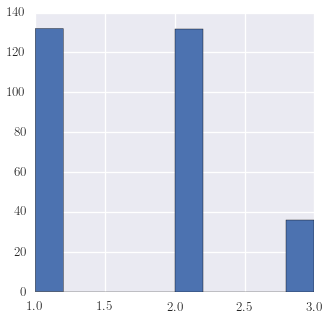

In [751]:
sea.set_context('talk')
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(n_max_arr)
fig.savefig('n4494_mode_post.pdf')

In [5]:
foo = np.zeros((10))

In [6]:
print foo[4,...]

0.0
